## Notebook for drawing AC circuits related graphs

This notebook contains code to generate graphs of sine functions in time (AC current or voltage, for example) and empty polar coordinate systems.

Sine graphs can contain multiple functions on the same coordinate system and are intended to be used for generating examples and problems for exams in the education of electrical engineering.

Similarly, the empty polar coordinate systems are intended to be used for students to draw phasors (C numbers), representing AC quantities, on them.

### Instructions for use

Each of the cells need to be executed (_shift+Enter_) at least once, some of them possibly need adapting to your needs. Each cell contains comments (behind the # signs) that contain some instructions and clarifications of the code. If one reads them carefully one should be able to make use of the notebook, at least anyone that is knowledgable or resourceful enough to have been able to start the thing in the first place.

Hope it will be of use :)

In [1]:
%matplotlib inline
%config IPCompleter.greedy=True
#from ipywidgets import interactive, fixed
from matplotlib import pyplot as plt
import numpy as np
import random
import codecs

### Draw sine graphs

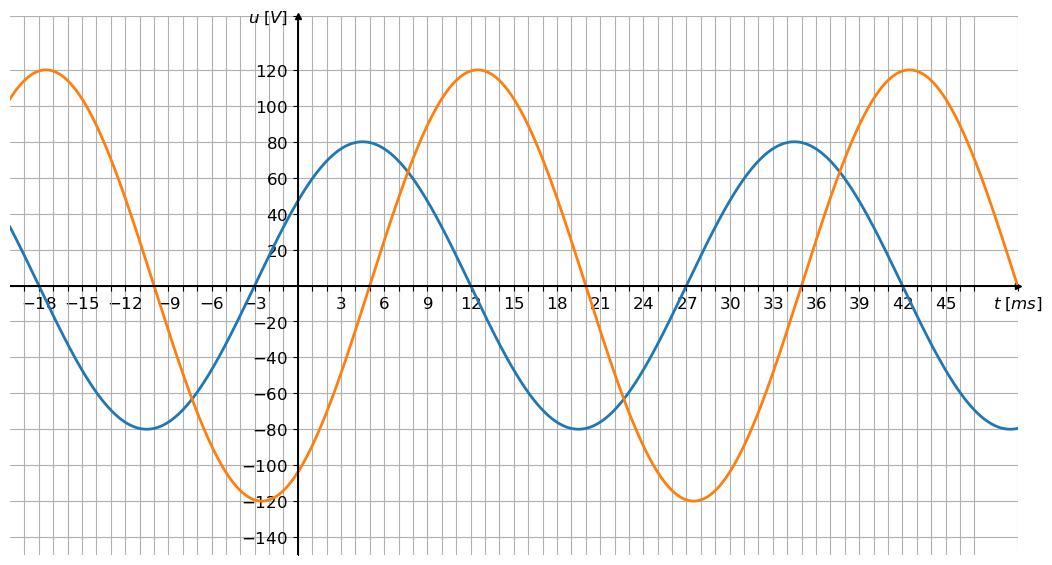

In [3]:
T = 30 # input: period in miliseconds
As = [80, 120] # input: amplitudes (as many as you wish)
phis = [+np.pi/5, -np.pi/3] # input: phase offsets (as many as there are amplitudes)

T = T/1000
f = 1/T
w = 2*np.pi*f
A = max(As)
dts = map(lambda phi: T*phi/(2*np.pi), phis)
    
tmin, tmax = -T*2/3, T*5/3 # begining and end of graphs (in time)
t = np.linspace(tmin, tmax, 1000)

tlocs = list(np.concatenate((np.arange(-T/30, tmin, -T/30), np.arange(T/30, tmax-2*T/30, T/30))))
tlocs.append(tmax)
tlabels = list(map(lambda t: r'${:d}$'.format(int(t*1000)) if int(t*1000)%3 == 0 else '', tlocs))
tlabels[-1] = r'$t\;[ms]$' # x-axis label

ymin, ymax = -1.25*A, +1.25*A # top and bottom of the coordinate system (in amplitudes)
ylocs = list(np.concatenate((np.arange(-A/6, ymin, -A/6), np.arange(A/6, ymax-A/6, A/6))))
ylocs.append(ymax)
ylabels = list(map(lambda U: r'${:.0f}$'.format(U), ylocs))
ylabels[-1] = r'$u\;[V]$' # y-axis label

fig = plt.figure(figsize=(13,7)) # size of the output figure
ax = fig.gca()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# make arrows
ax.plot((1), (0), ls="", marker=">", ms=5, color="k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1), ls="", marker="^", ms=5, color="k", transform=ax.get_xaxis_transform(), clip_on=False)
# x-axis
#plt.xlabel(r"$t\;[ms]$", fontsize="large")
#plt.gca().xaxis.set_label_coords(0.975, 0.49)
plt.xlim(tmin, tmax)
plt.xticks(tlocs, tlabels, fontsize="large")
#plt.setp(ax.xaxis.get_majorticklabels(), ha="left")
# y-axis
#plt.ylabel(r"$I\;[mA]$", fontsize="large")
#plt.gca().yaxis.set_label_coords(0.28, 0.95)
plt.ylim(ymin, ymax)
plt.yticks(ylocs, ylabels, fontsize="large")

#plt.plot(t, A*np.sin(w*t), 'k--', lw=1.0)
for A, phi in zip(As, phis):
    plt.plot(t, A*np.sin(w*t + phi), lw=2.0)
plt.axvline(0, color='k', lw=1.4)
plt.axhline(0, color='k', lw=1.4)
plt.grid()
#plt.savefig("./graf_U.jpg") # to save the figure in a JPEG file
plt.show()

### Draw polar coordinate system

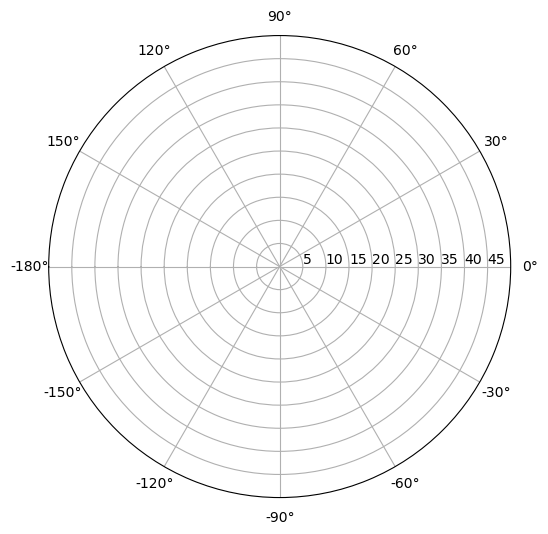

In [4]:
Umax = 50 # input: max r-value
r_marks = [] # input: distance from zero marks;
r_marks = np.arange(5, Umax, 5)
phi_marks = [] # input: marks for angles (in radians)
N = 12 # alternatively, for equal spacing/division of the whole circle
phi_marks = np.pi/180 * np.linspace(-180, 180, N, endpoint=False)

fig, ax = plt.subplots(figsize=(6,6), subplot_kw={'projection': 'polar'})
ax.set_rmax(Umax)
ax.set_rticks(r_marks)
ax.set_rlabel_position(0)
ax.set_xticks(phi_marks)
ax.set_thetalim(-np.pi, np.pi)
ax.grid(True)
#plt.savefig("./fazor-empty-50.png") # to save the figure in a JPEG file
plt.show()